<p align="center">
  <a href="url"><img src="https://images.unsplash.com/photo-1507720708252-1ddeb1dbff34?ixlib=rb-1.2.1&auto=format&fit=crop&w=1668&q=80" align="middle" height="383" width="640" ></a>
</p>

# Bagaimana Membuat Fully-Connected Image Classifier


Di dalam tutorial, kamu akan melatih sebuah fully-connected neural network untuk melakukan image classification bunga dandelion dan rumput. KIta akan menggunakan Framework Deep Learning TensorFlow untuk membuat neural network dan training/validation dataset. Pertama, silahkan download training and validation data.


### Building the Image Dataset

### Download the dataset train




In [1]:
# Download the train dataset
!wget https://github.com/Wayan123/my-computer-vision-labs/raw/main/train.zip

# Download the validation dataset
!wget https://github.com/Wayan123/my-computer-vision-labs/raw/main/valid.zip

--2024-06-11 08:20:21--  https://github.com/Wayan123/my-computer-vision-labs/raw/main/train.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Wayan123/my-computer-vision-labs/main/train.zip [following]
--2024-06-11 08:20:22--  https://raw.githubusercontent.com/Wayan123/my-computer-vision-labs/main/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10590507 (10M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]  10.10M  --.-KB/s    in 0.06s   

2024-06-11 08:20:23 (162 MB/s) - ‘train.zip’ saved [10590507/10590507]

--2024-06-11 08:20:23--  http

### Download dataset validation

Codingan Python ini menggunakan OS library untuk melakukan Operating System libraries, memberikan access ke file system dan zipfile library untuk unzip datanya.

In [2]:
#Import Library OS/Zipfile
import os
import zipfile

local_zip = 'train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = 'valid.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Isi dari .zip di extract ke directory `/tmp/train`, dimana setiap folder berisi subfolder dengan nama `dandelion` dan `rumput`.

Kita menggunakan [ImageGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class untuk membuat secara otomatis dataset train dari directory ini dengan menggunakan subdirectory untuk setiap kelasnya.

Menentukan setiap subdirectory :

In [3]:
# Directory with our training dandelion pictures
train_dandelion_dir = os.path.join('/tmp/train/dandelion')

# Directory with our training grass pictures
train_grass_dir = os.path.join('/tmp/train/grass')

# Directory with our validation dandelion pictures
valid_dandelion_dir = os.path.join('/tmp/valid/dandelion')

# Directory with our validation grass pictures
valid_grass_dir = os.path.join('/tmp/valid/grass')

Melihat seperti apa nama file di training directory `dandelion` dan `rumput` :

In [4]:
train_dandelion_names = os.listdir(train_dandelion_dir)
print(train_dandelion_names[:10])

train_grass_names = os.listdir(train_grass_dir)
print(train_grass_names[:10])

validation_dandelion_hames = os.listdir(valid_dandelion_dir)
print(validation_dandelion_hames[:10])

validation_grass_names = os.listdir(valid_grass_dir)
print(validation_grass_names[:10])

['00000137.jpg', '00000382.jpg', '00000009.jpg', '00000053.jpg', '00000218.jpg', '00000067.jpg', '00000395.jpg', '00000117.jpg', '00000408.jpg', '00000177.jpg']
['00000137.jpg', '00000382.jpg', '00000468.jpg', '00000009.jpg', '00000473.jpg', '00000427.jpg', '00000067.jpg', '00000395.jpg', '00000117.jpg', '00000408.jpg']
['00000009.jpg', '00000053.jpg', '00000061.jpg', '00000087.jpg', '00000072.jpg', '00000060.jpg', '00000070.jpg', '00000020.jpg', '00000026.jpg', '00000024.jpg']
['00000009.jpg', '00000053.jpg', '00000061.jpg', '00000036.jpg', '00000060.jpg', '00000021.jpg', '00000001.jpg', '00000035.jpg', '00000019.jpg', '00000045.jpg']


Mencari informasi berapa total images dari dandelion dan rumput di directory :

In [5]:
print('total training dandelion images:', len(os.listdir(train_dandelion_dir)))
print('total training rumput images:', len(os.listdir(train_grass_dir)))
print('total validation dandelion images:', len(os.listdir(valid_dandelion_dir)))
print('total validation rumput images:', len(os.listdir(valid_grass_dir)))

total training dandelion images: 451
total training rumput images: 443
total validation dandelion images: 65
total validation rumput images: 43


Melihat beberapa pictures untuk mendapatkan sense lebih baik Seperti apa.
Hal pertama yang dilakukan adalah melakukan konfigurasi matplot parameters:

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Menampilkan 8 batch dari 8 dandelion and 8 rumput pictures. Kamu bisa melakukan rerun cell kembali untuk melihat fresh batch setiap waktu:

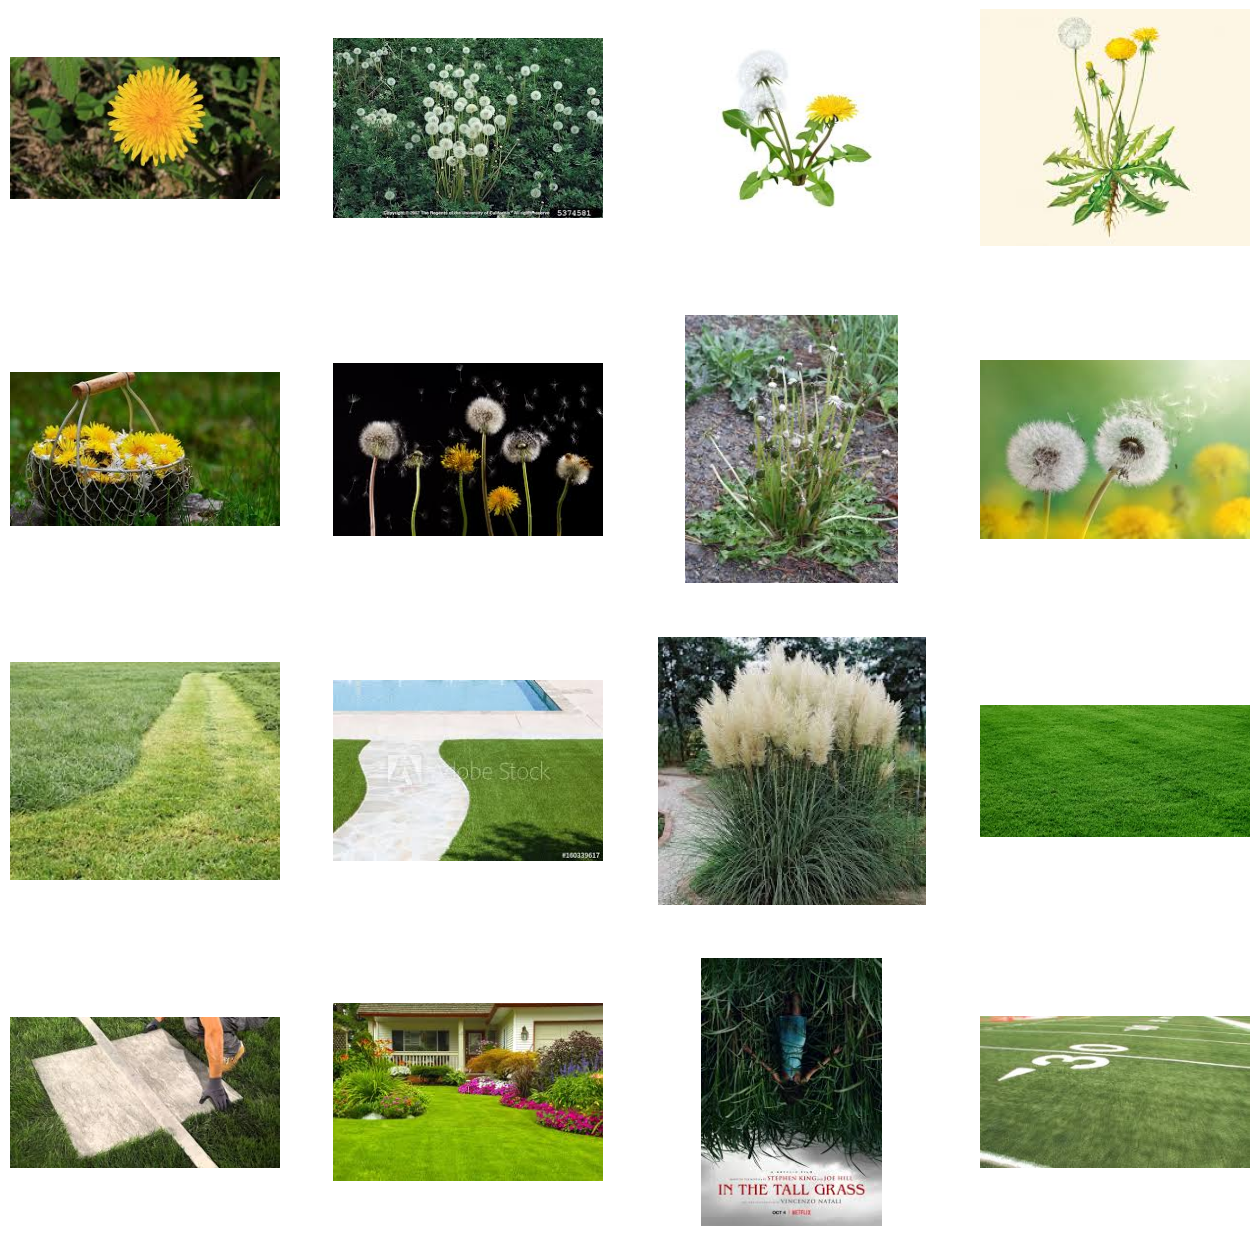

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dandelion_pic = [os.path.join(train_dandelion_dir, fname)
                for fname in train_dandelion_names[pic_index-8:pic_index]]
next_grass_pic = [os.path.join(train_grass_dir, fname)
                for fname in train_grass_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dandelion_pic + next_grass_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


#### Data Preprocessing

Menggunakan `keras.preprocessing.image.ImageDataGenerator` class untuk membuat  train and validation dataset dan normalize data.
Sangat penting untuk melakukan normalize data karena data akan diproses oleh CNN untuk improve performance secara keseluruhan. Disini kita akan menggunakan `rescale` parameter untuk scale our image pixel values dari [0, 255] ke [0,1].

Disetiap generator, kita menentukan source directory dari images, classes, input image size, batch size (seberapa banyak images yang akan diproses), dan class mode.

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import math
from torchsummary import summary
from sklearn.metrics import classification_report
from torch.optim.lr_scheduler import OneCycleLR
from tqdm import tqdm

## 1. Definisi KANLinear
  - Definisi ini mengikuti sumber yang diberikan dan digunakan dalam model CNNKAN.

In [9]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        self.reset_parameters()

    def reset_parameters(self):
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 1 / 2) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


## 2. Model CNNKAN
  - Model CNNKAN disesuaikan untuk ukuran gambar 200x200.

  Kode ini menggunakan BCEWithLogisticsLoss karena:
    - Stabilitas Numerik: BCEWithLogitsLoss lebih stabil karena menggabungkan sigmoid dan binary cross-entropy dalam satu operasi, mengurangi risiko gradien yang hilang atau meledak.
   - Kemudahan Penggunaan: Tidak perlu menerapkan sigmoid secara manual pada output model sebelum menghitung loss, yang membuat kode lebih sederhana dan mengurangi risiko kesalahan.

   Jika ingin menggunakan BCELoss, silakan gunakan kode berikut:

  class CNNKAN(nn.Module):
    def __init__(self):
        super(CNNKAN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        self.kan1 = KANLinear(64 * 50 * 50, 256)  # Adjusted for input size 200x200
        self.kan2 = KANLinear(256, 1)  # Output layer for binary classification

    def forward(self, x):
        x = F.selu(self.conv1(x))
        x = self.pool1(x)
        x = F.selu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.kan1(x)
        x = torch.sigmoid(self.kan2(x))  # Sigmoid for binary classification
        return x


In [10]:
# Define the model architecture with CustomResNet using KANLinear
class CustomResNetKAN(nn.Module):
    def __init__(self, num_classes=1):  # Set num_classes to 1 for binary classification
        super(CustomResNetKAN, self).__init__()
        self.model = models.resnet50(pretrained=True)
        self.model.fc = KANLinear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

## 4. Menggunakan ImageDataGenerator untuk Dataset Dandelion dan Grass
  - Dataset ini disiapkan menggunakan ImageDataGenerator dari Keras dan kemudian dikonversi menjadi PyTorch Dataset.

In [12]:
# Directory paths
train_dir = '/tmp/train'
val_dir = '/tmp/valid'

# Define data augmentation with correct input size for ResNet50
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# Define batch size
batch_size = 64

# Create the datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)
test_dataset = datasets.ImageFolder(root=val_dir, transform=transform_test)

# Create the data loaders with smaller batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## 5. Training dan Evaluasi Model
  - Bagian ini mendefinisikan loop training dan evaluasi model. Clear Gradients dan Kosongkan Cache

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

Validation: 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]


Train Loss: 0.518048, Validation Loss: 0.264153, Validation Accuracy: 87.96%
Epoch 2/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


Train Loss: 0.179733, Validation Loss: 0.168628, Validation Accuracy: 90.74%
Epoch 3/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]


Train Loss: 0.083056, Validation Loss: 0.197921, Validation Accuracy: 92.59%
Epoch 4/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


Train Loss: 0.096218, Validation Loss: 0.184896, Validation Accuracy: 93.52%
Epoch 5/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


Train Loss: 0.087452, Validation Loss: 0.117888, Validation Accuracy: 96.30%
Epoch 6/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


Train Loss: 0.096464, Validation Loss: 0.120921, Validation Accuracy: 95.37%
Epoch 7/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]


Train Loss: 0.066634, Validation Loss: 0.108035, Validation Accuracy: 95.37%
Epoch 8/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


Train Loss: 0.054755, Validation Loss: 0.103789, Validation Accuracy: 94.44%
Epoch 9/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


Train Loss: 0.059028, Validation Loss: 0.131923, Validation Accuracy: 95.37%
Epoch 10/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


Train Loss: 0.043721, Validation Loss: 0.166140, Validation Accuracy: 94.44%
Epoch 11/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]


Train Loss: 0.042897, Validation Loss: 0.116445, Validation Accuracy: 97.22%
Epoch 12/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


Train Loss: 0.039510, Validation Loss: 0.088027, Validation Accuracy: 96.30%
Epoch 13/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]


Train Loss: 0.031263, Validation Loss: 0.083092, Validation Accuracy: 96.30%
Epoch 14/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]


Train Loss: 0.041986, Validation Loss: 0.078155, Validation Accuracy: 96.30%
Epoch 15/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]


Train Loss: 0.059364, Validation Loss: 0.226689, Validation Accuracy: 95.37%
Epoch 16/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


Train Loss: 0.042502, Validation Loss: 0.165121, Validation Accuracy: 95.37%
Epoch 17/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]


Train Loss: 0.040937, Validation Loss: 0.066573, Validation Accuracy: 97.22%
Epoch 18/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]


Train Loss: 0.036015, Validation Loss: 0.100423, Validation Accuracy: 98.15%
Epoch 19/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]


Train Loss: 0.032239, Validation Loss: 0.139970, Validation Accuracy: 96.30%
Epoch 20/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


Train Loss: 0.026367, Validation Loss: 0.130545, Validation Accuracy: 95.37%
Epoch 21/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


Train Loss: 0.033272, Validation Loss: 0.118025, Validation Accuracy: 97.22%
Epoch 22/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


Train Loss: 0.033469, Validation Loss: 0.088640, Validation Accuracy: 97.22%
Epoch 23/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


Train Loss: 0.042955, Validation Loss: 0.100279, Validation Accuracy: 96.30%
Epoch 24/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]


Train Loss: 0.049331, Validation Loss: 0.122051, Validation Accuracy: 96.30%
Epoch 25/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


Train Loss: 0.028529, Validation Loss: 0.097235, Validation Accuracy: 98.15%
Epoch 26/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]


Train Loss: 0.021187, Validation Loss: 0.060581, Validation Accuracy: 98.15%
Epoch 27/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]


Train Loss: 0.025411, Validation Loss: 0.091026, Validation Accuracy: 94.44%
Epoch 28/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]


Train Loss: 0.017057, Validation Loss: 0.084303, Validation Accuracy: 95.37%
Epoch 29/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]


Train Loss: 0.018068, Validation Loss: 0.059579, Validation Accuracy: 97.22%
Epoch 30/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


Train Loss: 0.023808, Validation Loss: 0.043939, Validation Accuracy: 97.22%
Epoch 31/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


Train Loss: 0.023414, Validation Loss: 0.072466, Validation Accuracy: 96.30%
Epoch 32/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


Train Loss: 0.013267, Validation Loss: 0.098943, Validation Accuracy: 97.22%
Epoch 33/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


Train Loss: 0.027212, Validation Loss: 0.139374, Validation Accuracy: 95.37%
Epoch 34/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]


Train Loss: 0.012643, Validation Loss: 0.162333, Validation Accuracy: 94.44%
Epoch 35/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]


Train Loss: 0.025917, Validation Loss: 0.175276, Validation Accuracy: 95.37%
Epoch 36/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train Loss: 0.031965, Validation Loss: 0.102037, Validation Accuracy: 96.30%
Epoch 37/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]


Train Loss: 0.021166, Validation Loss: 0.095221, Validation Accuracy: 97.22%
Epoch 38/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


Train Loss: 0.036327, Validation Loss: 0.126728, Validation Accuracy: 98.15%
Epoch 39/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


Train Loss: 0.029881, Validation Loss: 0.150230, Validation Accuracy: 96.30%
Epoch 40/200


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


Train Loss: 0.015800, Validation Loss: 0.186991, Validation Accuracy: 93.52%
Early stopping triggered


Validation: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


Test Accuracy: 97.22%


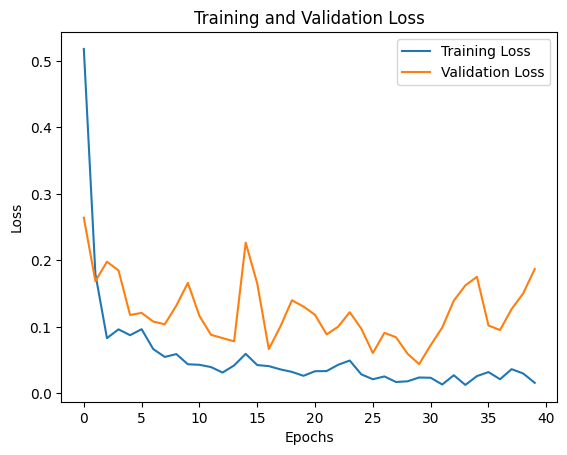

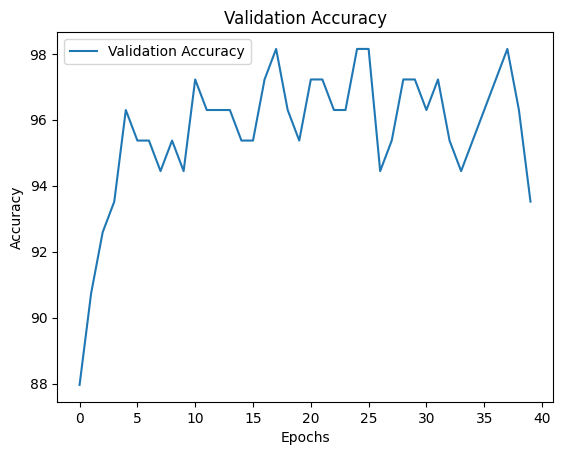

In [15]:
%%time

# Initialize model, loss function, optimizer, and scheduler
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CustomResNetKAN().to(device)

# Print model summary before DataParallel
summary(model, input_size=(3, 224, 224))

# Use DataParallel if using more than one GPU
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

print(model)

# Print model parameter details
def print_parameter_details(model):
    for name, param in model.named_parameters():
        print(f"{name}: {param.size()} {'requires_grad' if param.requires_grad else 'frozen'}")

print_parameter_details(model)

# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_loader), epochs=200)

# Training and validation functions
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader, desc='Training'):
        inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)  # Convert labels to float and add extra dimension
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    return running_loss / len(train_loader.dataset)

def validate(model, test_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Validation'):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)  # Convert labels to float and add extra dimension
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            predicted = (outputs > 0.5).int()  # Convert outputs to binary predictions
            correct += predicted.eq(labels.int()).sum().item()
    return val_loss / len(test_loader.dataset), 100. * correct / len(test_loader.dataset)

# Training loop
best_val_loss = float('inf')
patience = 10
patience_counter = 0

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(200):
    print(f"Epoch {epoch+1}/200")
    train_loss = train(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = validate(model, test_loader, criterion, device)
    scheduler.step()

    # Save losses and accuracy
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}, Validation Accuracy: {val_accuracy:.2f}%")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model_resnet50_KAN.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

# Load the best model weights
model.load_state_dict(torch.load('best_model_resnet50_KAN.pth'))

# Evaluate model on test set
accuracy = validate(model, test_loader, criterion, device)[1]
print(f'Test Accuracy: {accuracy:.2f}%')

# Plot training and validation loss
def plot_loss(train_losses, val_losses):
    plt.figure()
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Plot validation accuracy
def plot_accuracy(val_accuracies):
    plt.figure()
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()
    plt.show()

# Plot the losses and accuracy
plot_loss(train_losses, val_losses)
plot_accuracy(val_accuracies)

## 3. Evaluasi Model pada Data Test

In [16]:
"""
# Create the test dataset and loader
test_dir = '/tmp/test'
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

def test(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.squeeze() == labels).sum().item()

            # Kosongkan cache CUDA
            torch.cuda.empty_cache()

    accuracy = 100 * correct / total
    return accuracy

accuracy = test(model, test_loader, device)
print(f'Test Accuracy: {accuracy}%')
"""

"\n# Create the test dataset and loader\ntest_dir = '/tmp/test'\ntest_dataset = datasets.ImageFolder(root=test_dir, transform=transform)\ntest_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)\n\ndef test(model, test_loader, device):\n    model.eval()\n    correct = 0\n    total = 0\n    with torch.no_grad():\n        for inputs, labels in test_loader:\n            inputs, labels = inputs.to(device), labels.to(device)\n            outputs = model(inputs)\n            predicted = (outputs > 0.5).float()\n            total += labels.size(0)\n            correct += (predicted.squeeze() == labels).sum().item()\n\n            # Kosongkan cache CUDA\n            torch.cuda.empty_cache()\n\n    accuracy = 100 * correct / total\n    return accuracy\n\naccuracy = test(model, test_loader, device)\nprint(f'Test Accuracy: {accuracy}%')\n"

# Plot ROC Curve

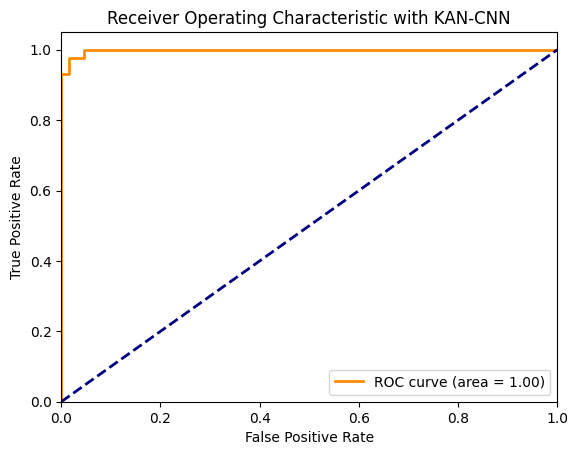

 
Accuracy: 0.9722
Precision: 0.9762
Recall: 0.9535
F1 Score: 0.9647
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98        65
     Class 1       0.98      0.95      0.96        43

    accuracy                           0.97       108
   macro avg       0.97      0.97      0.97       108
weighted avg       0.97      0.97      0.97       108



In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, precision_score, recall_score, f1_score
import torch

# Function to calculate predictions and true labels
def get_predictions_and_labels(model, test_loader, device):
    model.eval()
    preds = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds.extend(outputs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return np.array(preds), np.array(true_labels)

# Function to plot ROC Curve
def plot_roc_curve(true_labels, preds):
    fpr, tpr, _ = roc_curve(true_labels, preds)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic with KAN-CNN')
    plt.legend(loc="lower right")
    plt.show()

# Function to calculate and print classification metrics
def print_classification_metrics(true_labels, preds):
    preds_binary = (preds >= 0.5).astype(int) # Threshold for binary classification
    accuracy = accuracy_score(true_labels, preds_binary)
    precision = precision_score(true_labels, preds_binary)
    recall = recall_score(true_labels, preds_binary)
    f1 = f1_score(true_labels, preds_binary)
    report = classification_report(true_labels, preds_binary, target_names=['Class 0', 'Class 1'])

    print(" ")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Classification Report:')
    print(report)

# Assuming you have your model, val_loader, and device already defined
# Example usage
preds, true_labels = get_predictions_and_labels(model, test_loader, device)
plot_roc_curve(true_labels, preds)
print_classification_metrics(true_labels, preds)


# Model Prediction

Saving images (3).jpeg to images (3).jpeg


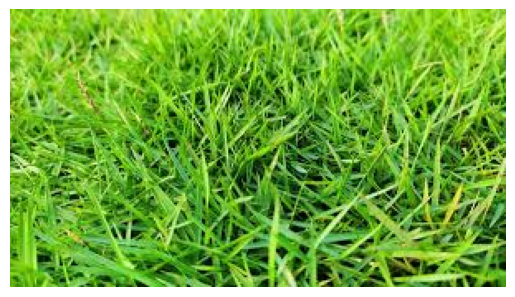

Prediksi untuk images (3).jpeg: 0.9978
images (3).jpeg ini adalah rumput


In [24]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor()
])

# Upload images
uploaded = files.upload()

# Predict and display images
for fn in uploaded.keys():
    # Load and preprocess image
    path = fn
    img = Image.open(path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)

    # Predict
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        prob = torch.sigmoid(output).item()

    # Display image
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.show()

    # Print prediction
    print(f"Prediksi untuk {fn}: {prob:.4f}")
    if prob < 0.5:
        print(f"{fn} ini adalah bunga dandelion")
    else:
        print(f"{fn} ini adalah rumput")


## Clean Up
Run the following cell to terminate the kernel and free memory resources:

In [ ]:
# import os, signal
# os.kill(os.getpid(), signal.SIGKILL)